# МЛ Практика 2: Анализ целевой числойо переменной, базовое моделирование, подбор параметров

In [3]:
y_regression = [1.35, 0.39, 1.22, 3.39] # только числа
y_classification = ['cat', 'crocodile', 'dog', 'elephan'] # метки классов

In [4]:
!pip install pandas seaborn scikit-learn

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/student-mat.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
# сразу обозначаем признаки, которые мы используем

df.absences = df.absences.astype('category')
df['romantic'] = df['romantic'].astype('category')

In [9]:
'age' in df.columns

True

In [10]:
# В задачах ML мы должны выделить целевую переменную Y и остальное оставить X
# Y - переменная, которую мы хотим исследовать, предсказать, и так далее
# X - зависимые перменные, влияние которых мы изучаем на Y

y = df['age']
X = df.drop('age', axis=1) if 'age' in df.columns else df

# P.S. принято обозначать Y как целевая переменная, x - зависимая

In [11]:
X.head(n=3) # первые 3 строки перменной X, удостоверимя что age не существует

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10


In [12]:
y.head(n=3)

,age
0,18
1,17
2,15


### Моделирование (Линейная регрессия)

In [13]:
from sklearn.linear_model import LinearRegression # модель линейной регрессии

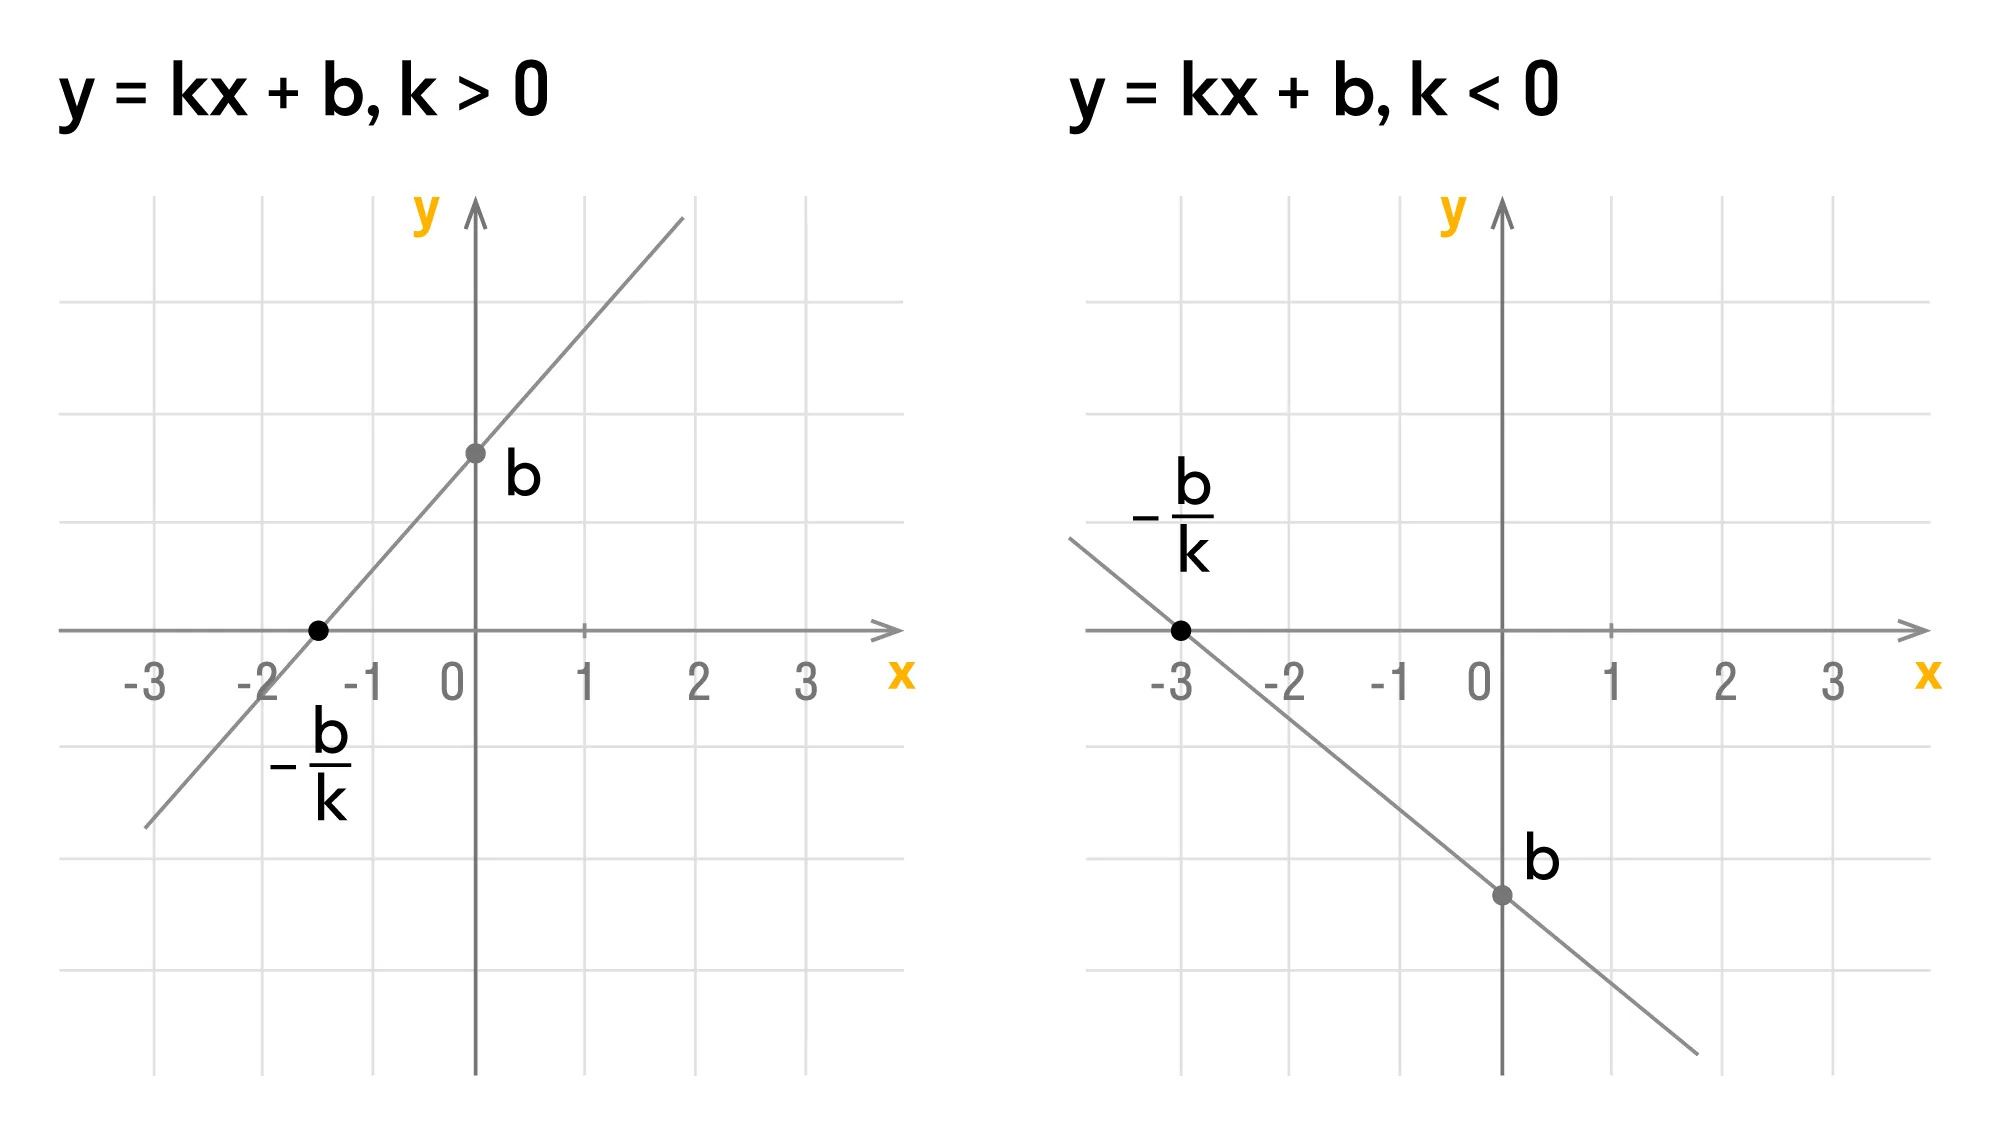

k > 0: 1.2257878937252535 b: 0.971649913757629
k < 0: -1.0246548891975336 b: -0.9626290436324757


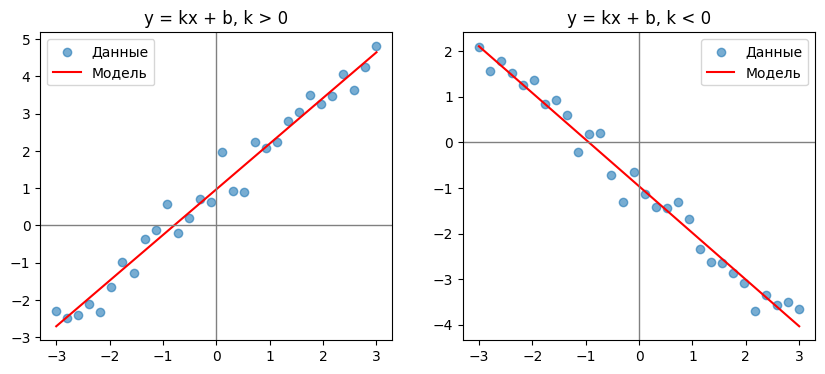

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Синтетические данные для положительного наклона
X_pos = np.linspace(-3, 3, 30).reshape(-1, 1)
y_pos = 1.2 * X_pos.flatten() + 1 + np.random.normal(0, 0.3, size=X_pos.shape[0])

# Синтетические данные для отрицательного наклона
X_neg = np.linspace(-3, 3, 30).reshape(-1, 1)
y_neg = -1.0 * X_neg.flatten() - 1 + np.random.normal(0, 0.3, size=X_neg.shape[0])

# Обучение моделей
model_pos = LinearRegression().fit(X_pos, y_pos)
model_neg = LinearRegression().fit(X_neg, y_neg)

print("k > 0:", model_pos.coef_[0], "b:", model_pos.intercept_)
print("k < 0:", model_neg.coef_[0], "b:", model_neg.intercept_)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# k > 0
axs[0].scatter(X_pos, y_pos, label="Данные", alpha=0.6)
axs[0].plot(X_pos, model_pos.predict(X_pos), color="red", label="Модель")
axs[0].axhline(0, color="gray", linewidth=1)
axs[0].axvline(0, color="gray", linewidth=1)
axs[0].set_title("y = kx + b, k > 0")
axs[0].legend()

# k < 0
axs[1].scatter(X_neg, y_neg, label="Данные", alpha=0.6)
axs[1].plot(X_neg, model_neg.predict(X_neg), color="red", label="Модель")
axs[1].axhline(0, color="gray", linewidth=1)
axs[1].axvline(0, color="gray", linewidth=1)
axs[1].set_title("y = kx + b, k < 0")
axs[1].legend()

plt.show()


#### Базовое обучение модели и борьба с категориальными признаками

⛳
Начнем с того, что модели машинного обучения работает только с числами, векторными матрицами

```
[
  [1,0,1],
  [1,0,2],
  ...
]
```
Вектор -> строка в DataFrame

Матрица -> Весь dataframe

**Модели машинного обучения общаются исключительно на языке чисел и не понимают символьные представления**

In [15]:
model = LinearRegression(
    fit_intercept=True, # считать свобоный коэфициент B
    copy_X=True, # Глубокое коирование матрицы X, чтробы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)

In [16]:
model.fit(X, y)

ValueError: could not convert string to float: 'GP'

In [17]:
X['school'] # категориальный признак

,school
0,GP
1,GP
2,GP
3,GP
4,GP
...,...
390,MS
391,MS
392,MS
393,MS


In [18]:
X['Fjob']

,Fjob
0,teacher
1,other
2,other
3,services
4,other
...,...
390,services
391,services
392,other
393,other


Существует несколько схем кодирования категориальных признаков

**1. Label Encoding**

```
['выжил', 'умер'] → [1, 0]
```

* Каждое значение = число.
* Используем для **2 категорий** или если есть **порядок**. Либо считаем так -> если bool значение, то LabelEncoder

---

**2. One-Hot Encoding**

| Животное | Слон | Кот | Собака |
| -------- | ---- | --- | ------ |
| Слон     | 1    | 0   | 0      |
| Кот      | 0    | 1   | 0      |
| Собака   | 0    | 0   | 1      |

* Каждая категория → отдельная колонка.
* Используем для **3+ категорий без порядка**.

---
* **2 категории или порядок → LabelEncoder**
* **3+ равноправных категорий → OneHotEncoder**
---
[Подробнее за кодирование категориальных признаков](https://habr.com/ru/articles/456294/)


In [19]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["Fjob"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [20]:
encoder.categories_

[array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)]

In [21]:
encoder.get_feature_names_out()

array(['Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher'], dtype=object)

In [22]:
# превратим обратно в DataFrame с колонками
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
390,0.0,0.0,0.0,1.0,0.0
391,0.0,0.0,0.0,1.0,0.0
392,0.0,0.0,1.0,0.0,0.0
393,0.0,0.0,1.0,0.0,0.0


#### Предсказываем результат

In [23]:
X = X.drop('Fjob', axis=1) if 'Fjob' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'Fjob_other' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('school', axis=1) if 'school' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'school_GP' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('sex', axis=1) if 'sex' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'sex_F' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('address', axis=1) if 'address' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'U' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('famsize', axis=1) if 'famsize' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'famsize_GT3' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('Pstatus', axis=1) if 'Pstatus' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'Pstatus_A' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('Mjob', axis=1) if 'Mjob' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'Mjob_at_home' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('reason', axis=1) if 'reason' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'reason_course' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('guardian', axis=1) if 'guardian' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'guardian_mother' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('schoolsup', axis=1) if 'schoolsup' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'schoolsup_yes' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('famsup', axis=1) if 'famsup' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'famsup_yes' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('paid', axis=1) if 'paid' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'paid_yes' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('activities', axis=1) if 'activities' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'activities_yes' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('nursery', axis=1) if 'nursery' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'nursery_yes' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('higher', axis=1) if 'higher' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'higher_yes' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('internet', axis=1) if 'internet' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'internet_yes' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

X = X.drop('romantic', axis=1) if 'romantic' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'romantic_yes' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

In [24]:
X

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,4,4,2,2,0,4,3,4,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,2,0,5,3,3,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,1,2,3,4,3,2,2,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,1,3,0,3,2,2,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,3,1,2,0,4,3,2,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,1,2,2,5,5,4,4,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
391,3,1,2,1,0,2,4,5,3,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
392,1,1,1,1,3,5,5,3,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
393,3,2,3,1,0,4,4,1,3,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
model.fit(X, y) # обучаем модель

LinearRegression()

In [26]:
y_pred = model.predict(X) # предсказываем результат
y_pred

array([16.08621824, 16.65991873, 17.62104309, 16.19107319, 15.72523963,
       16.42848781, 16.5889131 , 16.47116638, 16.33536073, 15.90326497,
       15.69917482, 16.57223733, 16.08866379, 16.2572091 , 16.22502274,
       16.35765252, 16.34700697, 16.15376554, 17.9050553 , 15.87008442,
       15.96447143, 15.18664686, 15.93909406, 16.82978942, 15.90567213,
       16.57783969, 16.38885725, 16.59360479, 16.33417473, 16.9736316 ,
       16.00412873, 15.97744657, 16.44602816, 16.01059557, 15.99530748,
       15.84507444, 16.19358157, 15.95316017, 15.75933191, 16.65217089,
       16.95959869, 16.43362669, 16.24869249, 16.12918181, 17.62442202,
       16.4277276 , 16.61061995, 16.60856979, 16.48472978, 16.35039804,
       16.59895445, 15.988973  , 16.67240221, 15.73287064, 16.92241989,
       16.81298322, 16.21172486, 15.45284779, 16.70587171, 16.23400871,
       15.98428908, 17.40080542, 16.58126104, 15.95343052, 16.46579225,
       16.71426381, 16.72348783, 16.53655444, 16.54174952, 17.06

#### Анализ результатов

Интерпретация результатов одна из самых важных частей ML

Попробуем проанализировать "Наивным способом" И "Как стоит"

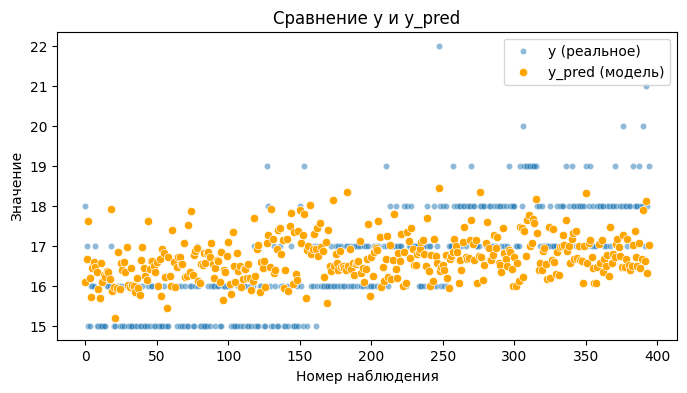

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

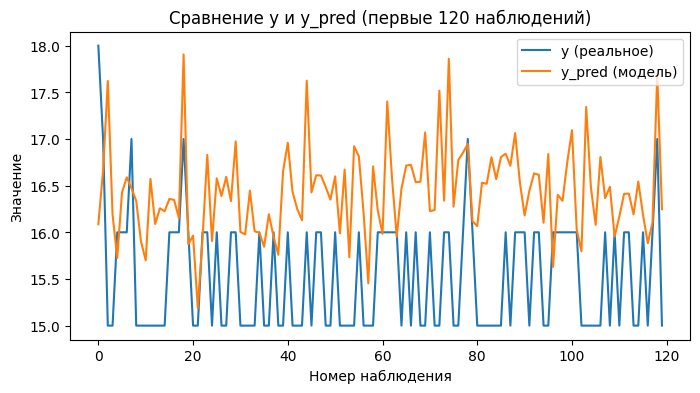

In [28]:
# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()


#### Метрики качества

Метрики качества - способ оценить разницу между предсказанными значениями и реальными значениями, чтобы оценить, насколько наша модель справляется с задачей

In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

In [30]:
y_pred = model.predict(X)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.957
MAPE=0.057, MAPE_as_percent=5.739%
R2=0.178
MSE=1.336
RMSE=1.156


Возьмём:

* Истинные: \[2.0, 2.5, 3.0]
* Предсказанные: \[2.2, 2.0, 2.8]

---

**MAE** (Mean Absolute Error)

1. Формула:

$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$

2. Считает среднюю абсолютную ошибку.
3. Показывает «в среднем, насколько мы ошибаемся» в единицах целевой переменной.
4. Чем ближе к 0 → тем лучше.
5. Пример:

* Истинные: \[2.0, 2.5, 3.0]
* Предсказанные: \[2.2, 2.0, 2.8]

MAE = \$|2.0-2.2| + |2.5-2.0| + |3.0-2.8| = 0.2 + 0.5 + 0.2 = 0.9\$

MAE = 0.9 / 3 = **0.3**

---

**MAPE** (Mean Absolute Percentage Error)

1. Формула:

$$
MAPE = \frac{100\%}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

2. То же, что MAE, но в процентах.
3. Показывает среднюю ошибку в % от истинного значения.
4. Чем ближе к 0% → тем лучше.

   * <10% → отлично
   * 10–20% → хорошо
   * 20–50% → терпимо
   * > 50% → плохо

MAPE = \$(0.2/2.0) + (0.5/2.5) + (0.2/3.0)\$

MAPE = \$0.1 + 0.2 + 0.067 = 0.367\$

MAPE = (0.367 / 3) × 100% = **12.2%**

---

**MSE** (Mean Squared Error)

1. Формула:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

2. Средний квадрат ошибки. Большие ошибки штрафуются сильнее.
3. Показывает «среднюю величину ошибки в квадрате».
4. Чем ближе к 0 → тем лучше.

MSE = \$(0.2^2 + 0.5^2 + 0.2^2) = 0.04 + 0.25 + 0.04 = 0.33\$

MSE = 0.33 / 3 = **0.11**

---

**RMSE** (Root Mean Squared Error)

1. Формула:

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }
$$

2. Корень из MSE → возвращает ошибку в тех же единицах, что и целевая переменная.
3. Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.
4. Чем ближе к 0 → тем лучше.

RMSE = \$\sqrt{0.11}\$ = **0.33**

---

**R²** (Коэффициент детерминации)

1. Формула:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

2. Показывает, насколько хорошо модель объясняет разброс данных.

3. Значение от \$-\infty\$ до 1:

   * 1 = идеально предсказывает,
   * 0 = модель не лучше среднего,
   * <0 = модель хуже среднего.

4. Чем ближе к 1 → тем лучше.

5. Пример:

* Истинные: \[2.0, 2.5, 3.0]
* Среднее \$\bar{y} = 2.5\$

SSE = \$(2.0-2.2)^2 + (2.5-2.0)^2 + (3.0-2.8)^2 = 0.04 + 0.25 + 0.04 = 0.33\$

SST = \$(2.0-2.5)^2 + (2.5-2.5)^2 + (3.0-2.5)^2 = 0.25 + 0 + 0.25 = 0.5\$

R² = \$1 - (0.33 / 0.5) = 1 - 0.66 = 0.34\$

**R² = 0.34 (модель слабенькая, но лучше чем «угадай среднее»)**


#### Разберемся с линейной регрессией

Задача модели - найти такую линию (гиперплскость), чтобы линия (гиперплоскость) наилучшим образом разделяла целеую переменную.

Модель линейной регрессии имеет формулу

``` y = kx + b ```

В нашем варианте

```y = w1*x1 + w(i) * x(i) + b```
где ```k = w```

Задача модели, найти такие ```w(i)``` и ```b``` - чтобы получить наилучший y



**Методы модели из scikit-learn**

* .**fit(X_train, y)** - обучение модели
* **.predict(X_test)** - по X предсказать Y

**Параметры модели из scikit-learn**

* **fit\_intercept (по умолчанию=True)**
  Добавлять ли свободный член $b$ в формулу $y = w_1 x_1 + ... + w_n x_n + b$.
  Если `False`, то предполагается, что данные уже «сдвинуты» к нулю, и $b = 0$.

* **copy\_X (по умолчанию=True)**
  Делать ли копию матрицы признаков `X`.
  Если `True`, данные не портятся. Если `False`, метод может их менять внутри себя. Почти всегда оставляют `True`.

* **n\_jobs (по умолчанию=None)**
  Сколько ядер процессора использовать для вычислений.

  * `None` = 1 ядро
  * `-1` = все доступные ядра
    Это ускоряет работу только для больших задач (много признаков или много целевых переменных).

* **positive (по умолчанию=False)**
  Если поставить `True`, то коэффициенты $w_i$ будут только положительными.
  Иногда это важно (например, цены не могут зависеть от признаков с отрицательным весом).

---

**Атрибуты модели (появляются после `fit`)**

* **coef\_**
  Массив коэффициентов $w_1, w_2, ..., w_n$, то есть «наклон» при каждом признаке.

  * если целевая переменная одна → одномерный массив;
  * если их несколько → двумерный.

* **intercept\_**
  Это $b$ — свободный член (сдвиг прямой). Если `fit_intercept=False`, то он будет равен 0.

* **rank\_**
  Ранг матрицы признаков `X` (показывает, есть ли линейно зависимые признаки).

* **singular\_**
  Сингулярные значения матрицы `X` (используются «под капотом» при вычислениях, для понимания устойчивости модели).

* **n\_features\_in\_**
  Количество признаков, которые были поданы на вход при обучении.

* **feature\_names\_in\_**
  Список названий признаков (если `X` был DataFrame с колонками-строками).



Итерация 0: ошибка=280.3873
Итерация 100: ошибка=269.4208
Итерация 200: ошибка=258.8957
Итерация 300: ошибка=248.7889
Итерация 400: ошибка=239.0813
Итерация 500: ошибка=229.7559
Итерация 600: ошибка=220.7971
Итерация 700: ошибка=212.1902
Итерация 800: ошибка=203.9211
Итерация 900: ошибка=195.9767
Итерация 1000: ошибка=188.3439
Итерация 1100: ошибка=181.0107
Итерация 1200: ошибка=173.9652
Итерация 1300: ошибка=167.1962
Итерация 1400: ошибка=160.6927
Итерация 1500: ошибка=154.4443
Итерация 1600: ошибка=148.4410
Итерация 1700: ошибка=142.6732
Итерация 1800: ошибка=137.1317
Итерация 1900: ошибка=131.8075
Итерация 2000: ошибка=126.6922
Итерация 2100: ошибка=121.7775
Итерация 2200: ошибка=117.0556
Итерация 2300: ошибка=112.5188
Итерация 2400: ошибка=108.1600
Итерация 2500: ошибка=103.9721
Итерация 2600: ошибка=99.9485
Итерация 2700: ошибка=96.0827
Итерация 2800: ошибка=92.3685
Итерация 2900: ошибка=88.7999


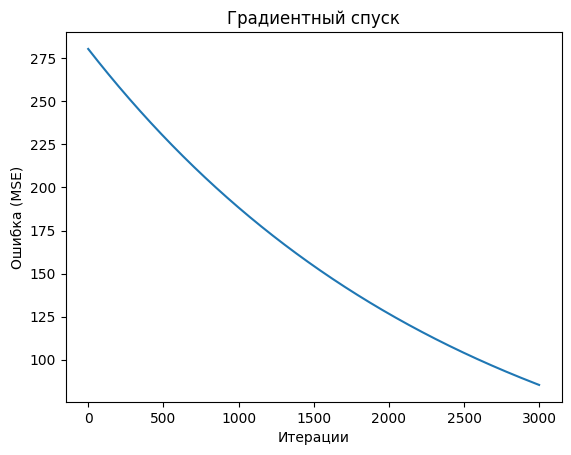

Коэффициенты (свободный член + признаки):
[ 7.53368214e+00 -6.03372893e-02 -5.47095634e-02  2.48630748e-02
  1.91243919e-02  1.10490496e-01  3.62328686e-02 -6.75371652e-03
  5.62522496e-02  5.33610163e-02  4.05465776e-02 -3.72340601e-02
  9.78089417e-02  1.41570208e-02 -4.11315446e-02 -5.62411064e-02
  6.08129278e-03 -6.28537632e-03 -4.19738554e-04  1.39376263e-03
 -1.68749611e-03  6.08129278e-03 -6.28537632e-03 -4.19738554e-04
  1.39376263e-03 -1.68749611e-03  6.08129278e-03 -6.28537632e-03
 -4.19738554e-04  1.39376263e-03 -1.68749611e-03  6.08129278e-03
 -6.28537632e-03 -4.19738554e-04  1.39376263e-03 -1.68749611e-03
  6.08129278e-03 -6.28537632e-03 -4.19738554e-04  1.39376263e-03
 -1.68749611e-03  6.08129278e-03 -6.28537632e-03 -4.19738554e-04
  1.39376263e-03 -1.68749611e-03  6.08129278e-03 -6.28537632e-03
 -4.19738554e-04  1.39376263e-03 -1.68749611e-03  6.08129278e-03
 -6.28537632e-03 -4.19738554e-04  1.39376263e-03 -1.68749611e-03
  6.08129278e-03 -6.28537632e-03 -4.19738554e-04

In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def make_linear_regression(X, y, learning_rate=0.001, n_iter=1000):
    # переводим X и y в numpy
    X = np.array(X)
    y = np.array(y)

    # добавим столбец 1 для свободного члена (bias)
    X = np.c_[np.ones(X.shape[0]), X]

    n_samples, n_features = X.shape

    # инициализация весов
    w = np.zeros(n_features)

    # история ошибок для визуализации
    losses = []

    for i in range(n_iter):
        y_pred = X.dot(w)
        error = y_pred - y

        # MSE
        loss = (error ** 2).mean()
        losses.append(loss)

        # шаг градиентного спуска
        grad = (2 / n_samples) * X.T.dot(error)
        w -= learning_rate * grad

        if i % 100 == 0:
            print(f"Итерация {i}: ошибка={loss:.4f}")

    return w, losses

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

w, losses = make_linear_regression(X_scaled, y, learning_rate=0.0001, n_iter=3000)

plt.plot(losses)
plt.xlabel("Итерации")
plt.ylabel("Ошибка (MSE)")
plt.title("Градиентный спуск")
plt.show()

print("Коэффициенты (свободный член + признаки):")
print(w)


#### Разбираемся с признаками (EDA) - предварительный анализ данных

In [32]:
df.head(n=3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [33]:
# целевая переменная
y_eda = df["absences"]

# признаки (убираем absences)
X_eda = df.drop(columns=["absences"])


In [34]:
# P.S. в своем df я предварительно сделал .astype(cateogyr), вам нужно здесь сделать тоже самое

X_eda.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,13.000000,13.000000,14.000000


**Пояснения**


health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64


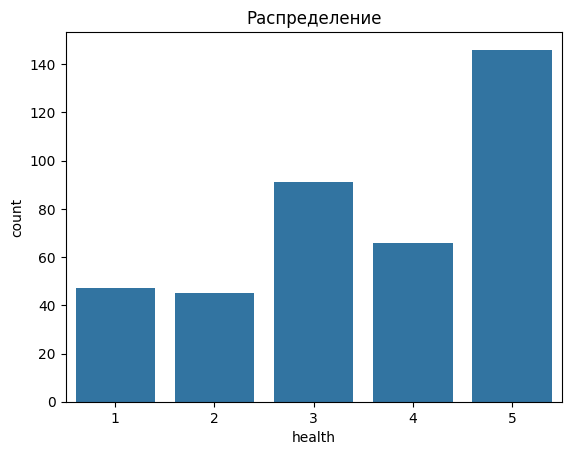

        count  unique  top  freq
health                          
1          47      15    0    13
2          45      15    0    12
3          91      18    0    24
4          66      17    0    16
5         146      23    0    50


In [35]:
print(df["health"].value_counts())
sns.countplot(data=df, x="health")
plt.title("Распределение")
plt.show()

print(df.groupby("health")["absences"].describe())


**Пояснения по распределению качества вина:**

* Больше всего вин с оценкой **5 и 6** (их почти 5000 вместе).
* Крайние оценки редкие: качество **3** всего 30 вин, а **9** всего 5 вин.
* То есть датасет несбалансированный → в основном «средние» вина.

**По алкоголю в зависимости от качества:**

* При низком качестве (3–4) средний алкоголь ≈ **10.2**.
* У среднего качества (5–6) алкоголь чуть выше: **10.6**.
* У хорошего качества (7–8) средний алкоголь заметно больше: **11.4–11.7**.
* У редких вин с качеством 9 алкоголь самый высокий ≈ **12.2**.

**Вывод:**

* Чем выше **качество вина**, тем выше в среднем его **содержание алкоголя**.
* Распределение сильно «сосредоточено» на значениях 5–6, так что модель будет предсказывать их чаще.


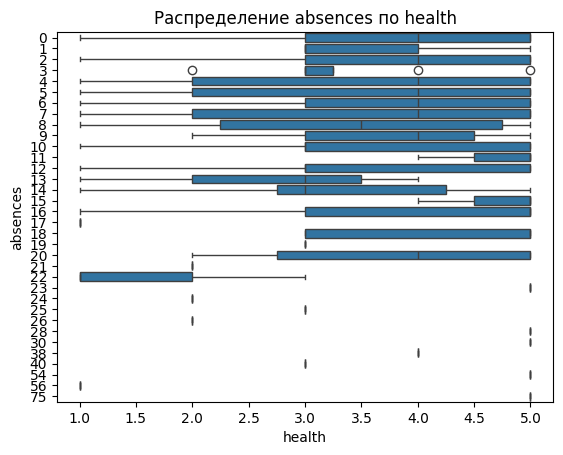

In [36]:
sns.boxplot(data=df, x="health", y="absences")
plt.title("Распределение absences по health")
plt.show()

**Вывод:**
При низком количестве прогулов высокий показатель здоровья, амплитуда не сильно выражена, но всё же колебания присутствуют

freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64


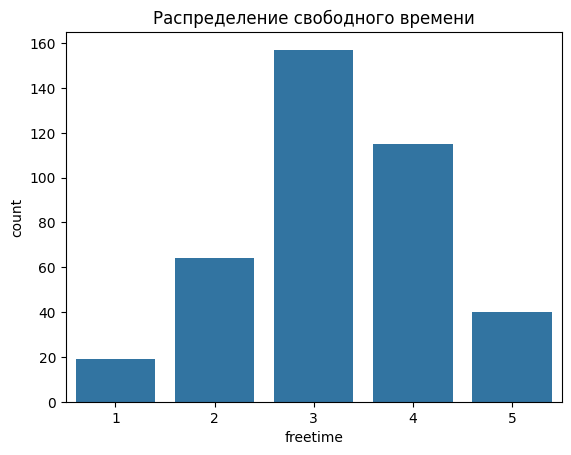

          count  unique  top  freq
freetime                          
1            19      10    0     5
2            64      16    0    14
3           157      23    0    53
4           115      20    0    32
5            40      13    0    11


In [37]:
print(df["freetime"].value_counts())
sns.countplot(data=df, x="freetime")
plt.title("Распределение свободного времени")
plt.show()

print(df.groupby("freetime")["absences"].describe())


**Пояснения:**

* В датасете **преобладают учащиеся с оценкой свободного времени "3"** (≈158), на втором месте **"2"** (≈65).
* Чем больше **свободного времени**, тем больше показатель **прогулов**

**Вывод:**
В качестве вывода можно сказать, что чем выше показатель свободного времени, тем выше показатель прогулов, можно сказать, что оба показателя зависят друг от друга.


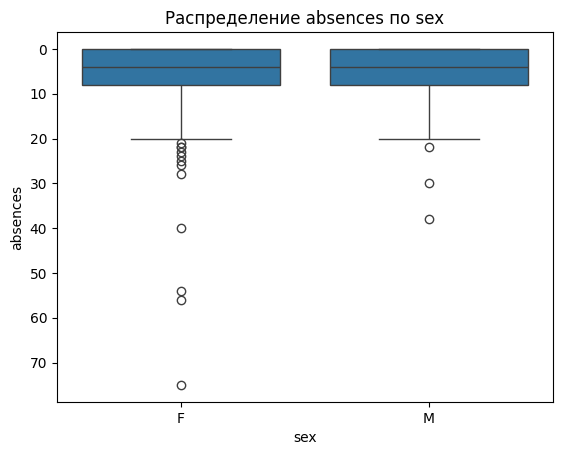

In [38]:
sns.boxplot(data=df, x="sex", y="absences")
plt.title("Распределение absences по sex")
plt.show()

***Пояснения***
- Медиана идентична, отличия в единичных включениях преобладают у женского пола в виде большего количества прогулов

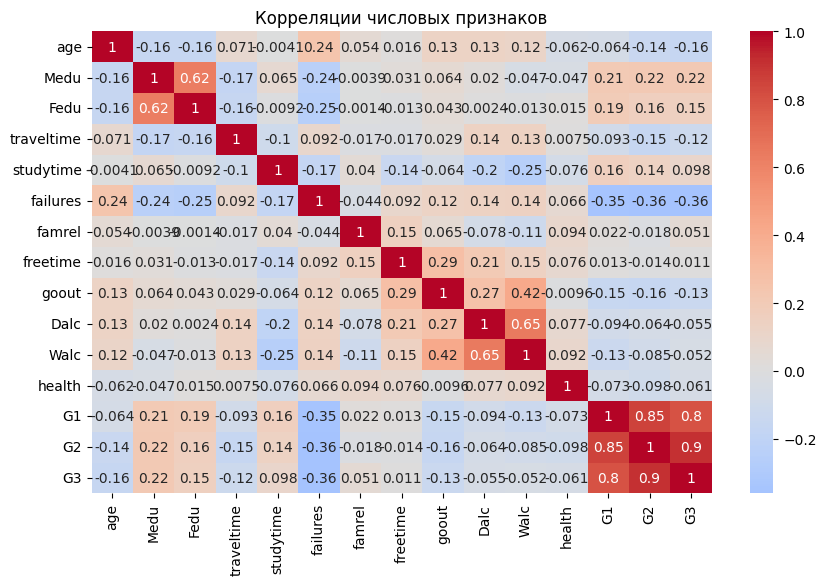

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()


**Корреляции с G3(Итоговые оценки):**
- **Medu и Fedu**(Образование отца и матери): практически нет влияния(0.22-0.15)
- **age, traveltime** и **failures**(возраст, время на дорогу до школы и обратно, провалы в учебе в прошлом): слабая и средняя отрицательная связь.
- **G1** и **G2**: сильная положительная связь, логично что оценки за предидущие грейды сильно связаны с итоговыми оценками.
- **Остальные** переменные слабо коррелируют с G3.
---

**Вывод:**

* На итоговые оценки сильнее всего влияет **G1, G2**.
* Средняя связь: **failures** (−0.36).
* Остальные признаки почти не коррелируют.


/tmp/ipython-input-2737465869.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


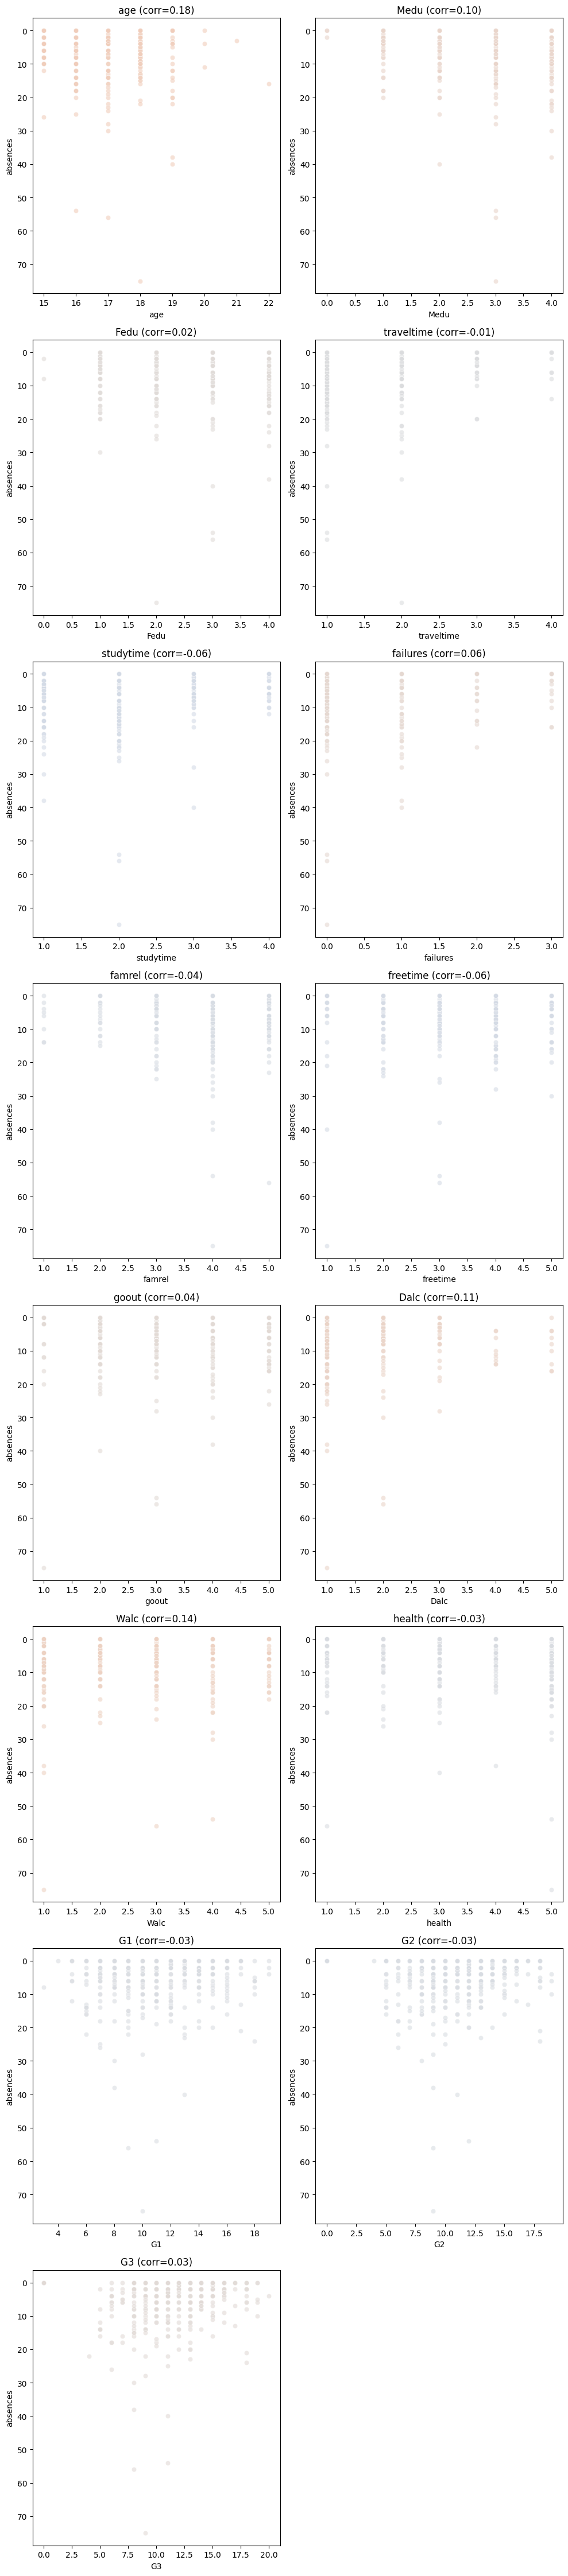

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X_eda.select_dtypes(include="number").columns
n = len(num_features)

# корреляции с absences
corrs = df[num_features].corrwith(df["absences"])

# палитра (от синего до красного)
cmap = plt.cm.get_cmap("coolwarm")

# сетка графиков (2 в строку)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим [-1,1] → [0,1]

    sns.scatterplot(ax=axes[i], data=df, x=col, y="absences", color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

# удаляем пустые ячейки
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Попробуем отобрать только важные признаки

In [42]:
categorial_features = ['health']
numerical_features = ['G1', 'G2', 'G3']

best_features = categorial_features + numerical_features # соединение массивов

X = df[best_features] # обращение к нескольким колонкам
y = df.absences

In [43]:
X.head(n=2)

,health,G1,G2,G3
0,3,5,6,6
1,3,5,5,6


In [44]:
y.head()

,absences
0,6
1,4
2,10
3,2
4,4


In [45]:
X_scaled = StandardScaler().fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head(n=3)

,health,G1,G2,G3
0,-0.399289,-1.782467,-1.254791,-0.964934
1,-0.399289,-1.782467,-1.520979,-0.964934
2,-0.399289,-1.179147,-0.722415,-0.090739


#### Разделение на тестовую и обучающую

Разделение на тестовую и обучающую выборки неободимо для того, чтобы разделить выборку на несколько выборок, данные на которых обучаем и данные на которых тестируем результат.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест


In [47]:
len(X_train), len(X_test), len(y_train), len(y_test)

(316, 79, 316, 79)

In [48]:
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [51]:
def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

Оценка на выборке на которой обучали необходима для того, чтобы понять насколько наша модель пере/недообучена

In [52]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

метрики для выборки на которых обучалась модель
MAE 5.204
MAPE=6664166959992040.000, MAPE_as_percent=666416695999203968.000%
R2=0.032
MSE=68.409
RMSE=8.271


Оценка на выборке, которую модель никогда не видела, дает объективные представления о том, насколько влияют данные

In [53]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 4.561
MAPE=6917637264735233.000, MAPE_as_percent=691763726473523328.000%
R2=-0.072
MSE=38.428
RMSE=6.199


In [54]:
model.coef_

array([-0.47261491, -0.3379574 , -3.04828403,  3.52633855])

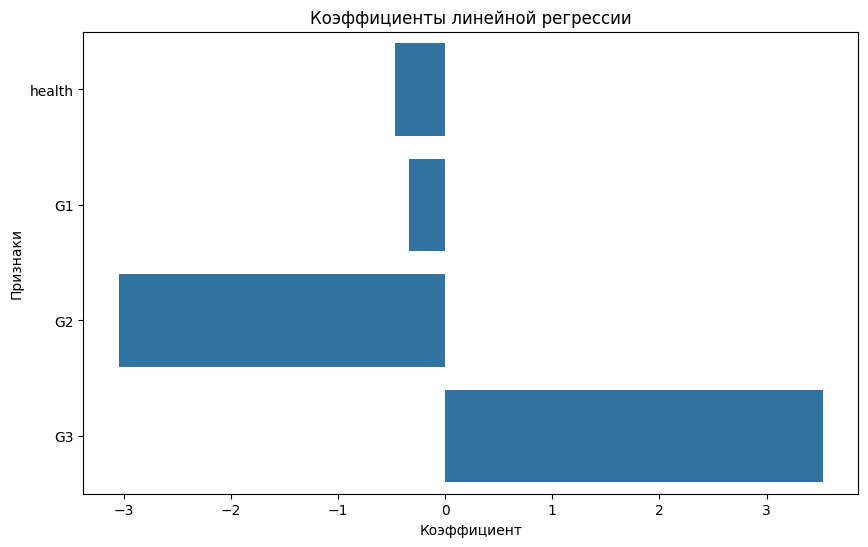

In [55]:

plt.figure(figsize=(10,6))
sns.barplot(x=model.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()


Коэффициенты линейной регрессии — это «веса» при признаках, которые показывают, как каждый признак влияет на целевую переменную.

---

**Интерпретация:**

Формула:

$$
y = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b
$$

* $w_i$ = коэффициент при признаке $x_i$.
* $b$ = свободный член (intercept).

---

**Что показывают:**

* **Знак ( + / − ):**

  * Положительный → рост признака увеличивает целевую переменную.
  * Отрицательный → рост признака уменьшает целевую переменную.

* **Величина:**

  * Абсолютное значение коэффициента показывает, насколько сильно признак влияет.
  * Больший по модулю коэффициент = более важный признак (если все признаки приведены к одной шкале).

---

**Важно:**

* Если признаки в разных единицах (например, «residual_sugar» и «pH»), коэффициенты напрямую сравнивать нельзя → нужно масштабирование (StandardScaler/MinMaxScaler).
* В противном случае один признак может казаться «важнее» просто потому, что у него большие значения.

#### Борьба с пропусками

In [56]:
import pandas as pd
import numpy as np

np.random.seed(42)

# категории
animals = np.random.choice(['cat', 'dog', None], size=20, p=[0.4, 0.4, 0.2])
ages = np.random.choice([1.5, 2.0, 2.5, 3.0, None], size=20, p=[0.2, 0.3, 0.2, 0.2, 0.1])

df = pd.DataFrame({
    "animal": animals,
    "age": ages
})

df

,animal,age
0,cat,2.5
1,None,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,None,2.5
8,dog,2.5
9,dog,1.5



**Категориальные признаки (animal)**

* **Удаление строк с пропусками**
  *Когда использовать:* если пропусков мало, и мы можем потерять эти строки без ущерба.
* **Заполнение константой ("unknown")**
  *Когда использовать:* если значение реально может быть «неизвестным» или «прочее».
* **Заполнение модой (самое частое значение)**
  *Когда использовать:* если пропусков много, а один класс сильно доминирует.
* **Предсказание моделью**
  *Когда использовать:* если пропуски большие, и важен этот признак (например, можно обучить классификатор).

---

**Числовые признаки (age)**

* **Удаление строк**
  *Когда использовать:* если пропусков мало.
* **Заполнение средним**
  *Когда использовать:* если распределение нормальное (симметричное).
* **Заполнение медианой**
  *Когда использовать:* если есть выбросы (устойчивее чем среднее).
* **Заполнение 0 или константой**
  *Когда использовать:* если 0 имеет смысл («нет данных» как отдельное состояние).
* **Интерполяция / предсказание моделью**
  *Когда использовать:* если признак важный, а пропусков много (линейная интерполяция или регрессия).

---

**Примеры кода (pandas)**

```python
# Категориальные (animal)
df['animal'].dropna()                       # удалить строки с NaN
df['animal'].fillna('unknown')              # заменить на "unknown"
df['animal'].fillna(df['animal'].mode()[0]) # заменить на моду

# Числовые (age)
df['age'].dropna()                     # удалить строки с NaN
df['age'].fillna(df['age'].mean())     # заменить на среднее
df['age'].fillna(df['age'].median())   # заменить на медиану
df['age'].fillna(0)                    # заменить на 0
df['age'].interpolate(method='linear') # интерполяция
```


In [57]:
df.dropna()

,animal,age
0,cat,2.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
8,dog,2.5
9,dog,1.5
10,cat,2.5
15,cat,3.0


In [58]:
df2_animal = df['animal'].copy().fillna('unknown')
df2 = df.copy()
df2.animal = df2_animal
df2

,animal,age
0,cat,2.5
1,unknown,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,unknown,2.5
8,dog,2.5
9,dog,1.5


In [59]:
df3_animal_mode = df['animal'].fillna(df['animal'].mode()[0])
df3 = df.copy()
df3.animal = df3_animal_mode
df3

,animal,age
0,cat,2.5
1,cat,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,cat,2.5
8,dog,2.5
9,dog,1.5


In [60]:
df4_age_mean = df['age'].fillna(df['age'].mean())
df4 = df.copy()
df4.age = df4_age_mean
df4

/tmp/ipython-input-2958849797.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4_age_mean = df['age'].fillna(df['age'].mean())


,animal,age
0,cat,2.500000
1,None,1.500000
2,dog,2.000000
3,dog,2.000000
4,cat,2.000000
5,cat,3.000000
6,cat,1.500000
7,None,2.500000
8,dog,2.500000
9,dog,1.500000


In [61]:
df5_age_mean = df['age'].fillna(df['age'].median())
df5 = df.copy()
df5.age = df5_age_mean
df5

/tmp/ipython-input-271118516.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5_age_mean = df['age'].fillna(df['age'].median())


,animal,age
0,cat,2.5
1,None,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,None,2.5
8,dog,2.5
9,dog,1.5
